# Python Bootcamp: Advent of Code (Day X)

## 1. Puzzle 1

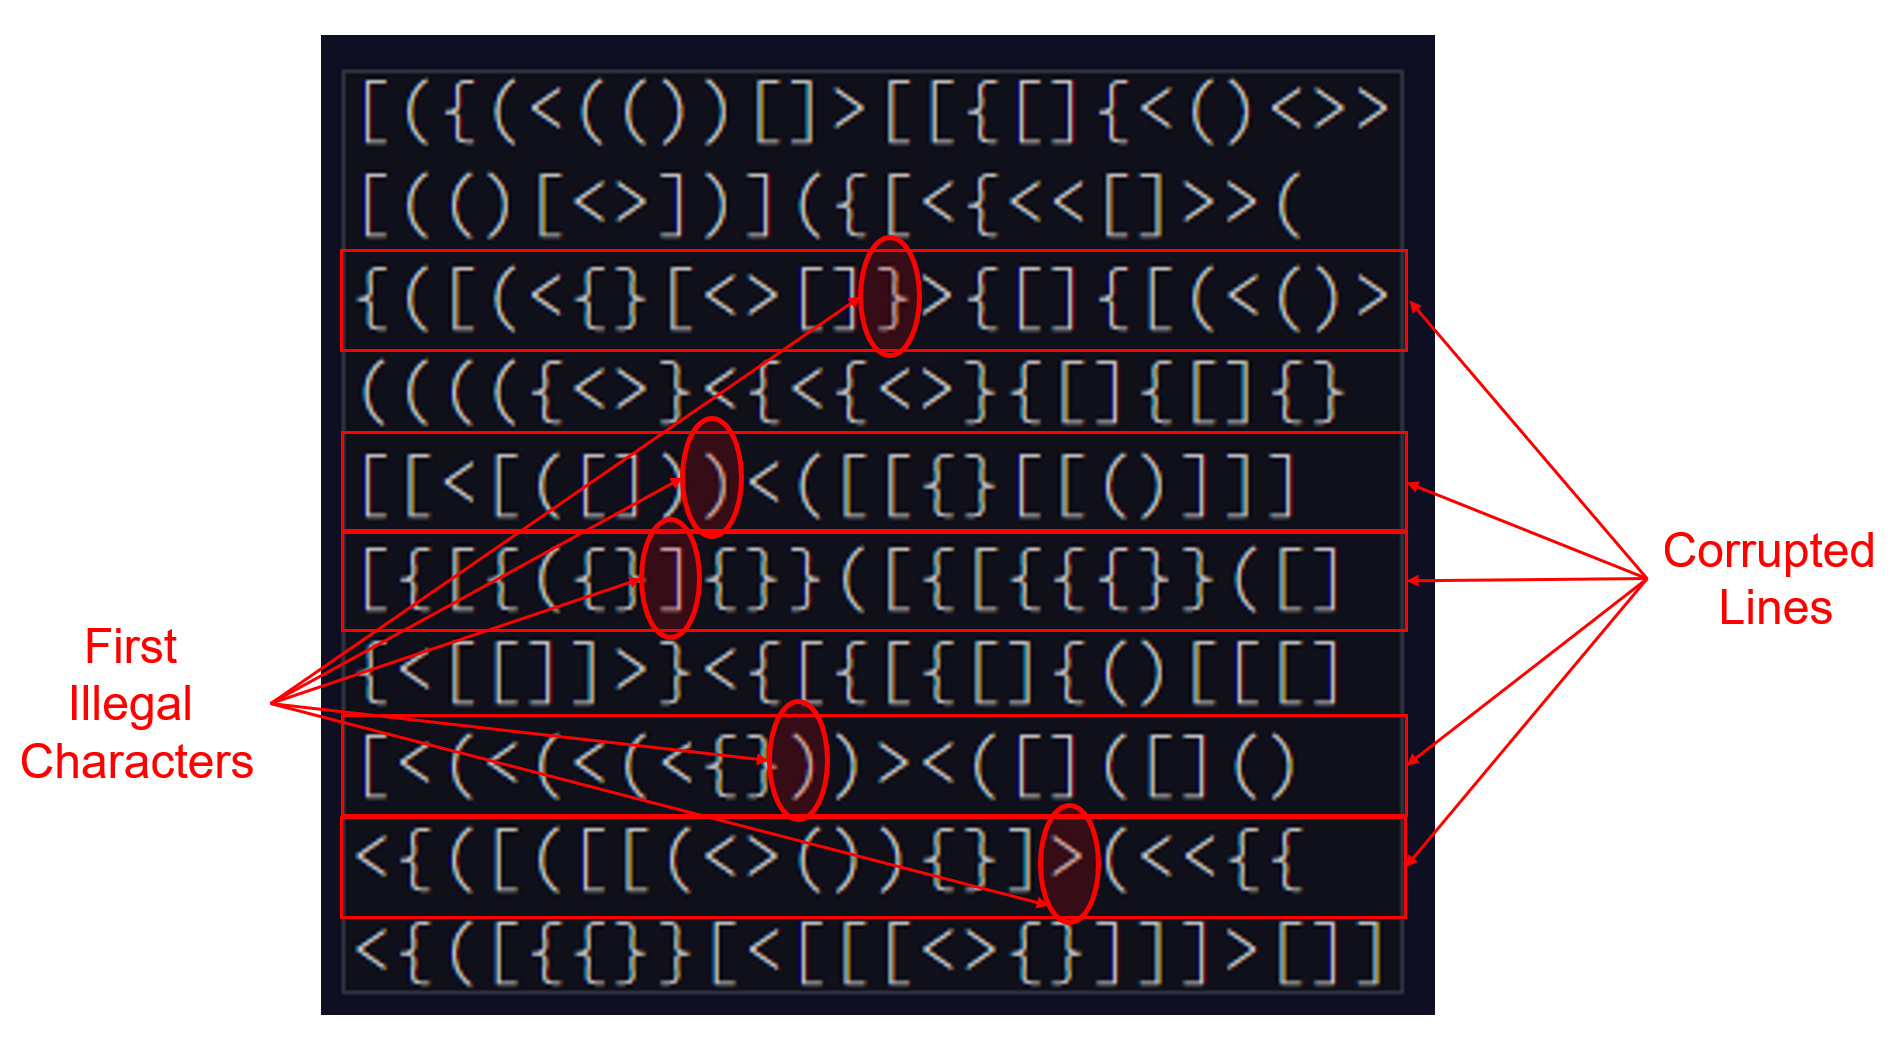

### 1.1 My Solution

In [127]:
from collections import Counter

def find_illegal_char(string):
    """If a string contains illegal character, return the first 
    illegal character in the string, otherwise, return None."""
    
    stack = []
    for idx, char in enumerate(string):
        if char in "{([<":
            stack.append(char)

        elif char in ">])}":
            if ((stack[-1] == "{" and char == "}") |
                (stack[-1] == "(" and char == ")") |
                (stack[-1] == "[" and char == "]") |
                (stack[-1] == "<" and char == ">")):
                stack.pop()
                          
            else:
                return char 
                break

def compute_score(all_illegal_chars):
    """Compute score given a list of illegal characters.""" 
    
    syntax_error_score = 0
    score_multiplier = {')': 3, ']': 57, '}': 1197, '>': 25137}
    for k, v in Counter(all_illegal_chars).items():
        syntax_error_score += v*score_multiplier[k]

    return syntax_error_score

if __name__ == '__main__':
    
    # Example data
    example_data = [
        "[({(<(())[]>[[{[]{<()<>>\n",
        "[(()[<>])]({[<{<<[]>>(\n",
        "{([(<{}[<>[]}>{[]{[(<()>\n",
        "(((({<>}<{<{<>}{[]{[]{}\n",
        "[[<[([]))<([[{}[[()]]]\n",
        "[{[{({}]{}}([{[{{{}}([]\n",
        "{<[[]]>}<{[{[{[]{()[[[]\n",
        "[<(<(<(<{}))><([]([]()\n",
        "<{([([[(<>()){}]>(<<{{\n",
        "<{([{{}}[<[[[<>{}]]]>[]]\n"
        ]
    example_data = [line.strip() for line in example_data]    
    
    assert find_illegal_char(example_data[0]) == None
    assert find_illegal_char(example_data[1]) == None
    assert find_illegal_char(example_data[2]) == '}'
    assert find_illegal_char(example_data[3]) == None
    assert find_illegal_char(example_data[4]) == ')'
    assert find_illegal_char(example_data[5]) == ']'
    assert find_illegal_char(example_data[6]) == None
    assert find_illegal_char(example_data[7]) == ')'
    assert find_illegal_char(example_data[8]) == '>'
    assert find_illegal_char(example_data[9]) == None
    
    all_illegal_chars = [find_illegal_char(string) for _, string in enumerate(example_data) 
                         if find_illegal_char(string) is not None]
    assert compute_score(all_illegal_chars) == 26397

    # Input data
    with open('data/input.txt') as f:
        input_data = [line.strip() for line in f.readlines()]    

    all_illegal_chars_input = [find_illegal_char(string) for _, string in enumerate(input_data) 
                         if find_illegal_char(string) is not None]

    print(f"Total syntax error score: {compute_score(all_illegal_chars_input)}")

Total syntax error score: 167379


## 2. Puzzle 2

### 2.1 My Solution

In [167]:
def find_remaining_stack(string):
    """Determine sequence of closing characters of a string in an incomplete line."""
    
    stack = []
    for idx, char in enumerate(string):
        if char in "{([<":
            stack.append(char)

        elif char in ">])}":
            if ((stack[-1] == "{" and char == "}") |
                (stack[-1] == "(" and char == ")") |
                (stack[-1] == "[" and char == "]") |
                (stack[-1] == "<" and char == ">")):
                stack.pop()
                
    return stack

def find_closing_chars(remaining_stack):
    """Reverse a given sequence of closing characters and replace each with its corresponding legal character."""

    closing_chars = remaining_stack[::-1]
    mapping = {'{': '}', '[': ']', '(': ')', '<': '>'}
    for idx, char in enumerate(closing_chars):
        closing_chars[idx] = mapping[char]
    
    return ''.join(closing_chars)

def compute_completion_score(closing_chars):
    """Compute the score of a particular string of closing characters"""
    
    scoring = {')': 1, ']': 2, '}': 3, '>': 4}
    total_score = 0
    for _, char in enumerate(closing_chars):
        total_score *= 5
        total_score += scoring[char]
    
    return total_score

def get_middle_score(data):
    """Given navigation subsystem data, return the middle score."""
    
    incomplete_lines = [string for _, string in enumerate(data) 
                        if find_illegal_char(string) is None]
    scores = []
    for line in incomplete_lines:
        closing_chars = find_closing_chars(find_remaining_stack(line))
        scores.append(compute_completion_score(closing_chars))
        
    return sorted(scores)[int(len(scores)/2)]


if __name__ == "__main__":
    
    # Example data
    example_data = [
        "[({(<(())[]>[[{[]{<()<>>\n",
        "[(()[<>])]({[<{<<[]>>(\n",
        "{([(<{}[<>[]}>{[]{[(<()>\n",
        "(((({<>}<{<{<>}{[]{[]{}\n",
        "[[<[([]))<([[{}[[()]]]\n",
        "[{[{({}]{}}([{[{{{}}([]\n",
        "{<[[]]>}<{[{[{[]{()[[[]\n",
        "[<(<(<(<{}))><([]([]()\n",
        "<{([([[(<>()){}]>(<<{{\n",
        "<{([{{}}[<[[[<>{}]]]>[]]\n"
        ]
    example_data = [line.strip() for line in example_data]

    assert find_closing_chars(find_remaining_stack(example_data[0])) == '}}]])})]'
    assert find_closing_chars(find_remaining_stack(example_data[1])) == ')}>]})'
    assert find_closing_chars(find_remaining_stack(example_data[3])) == '}}>}>))))'
    assert find_closing_chars(find_remaining_stack(example_data[6])) == ']]}}]}]}>'
    assert find_closing_chars(find_remaining_stack(example_data[9])) == '])}>'
    
    assert compute_completion_score('}}]])})]') == 288957
    assert compute_completion_score(')}>]})') == 5566
    assert compute_completion_score('}}>}>))))') == 1480781
    assert compute_completion_score(']]}}]}]}>') == 995444
    assert compute_completion_score('])}>') == 294

    assert get_middle_score(example_data) == 288957

    # Input data
    with open('data/input.txt') as f:
        input_data = [line.strip() for line in f.readlines()]    
    
    print(f"Middle score is {get_middle_score(input_data)}.")

Middle score is 2776842859.
